In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('BIKE DETAILS.csv')

In [69]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [70]:
df.shape

(1061, 7)

In [71]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [72]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [73]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

#Q1. What is the range of selling prices in the dataset?

- Range is calculated as Max. value - Min. value

In [74]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print('The range of selling price for bikes is :',price_range)

The range of selling price for bikes is : 755000


#Q2. What is the median selling price for bikes in the dataset?


In [75]:
sp_median = df['selling_price'].median()
print('The median selling price for bikes is :', sp_median)

The median selling price for bikes is : 45000.0


#3. What is the most common seller typeD

In [76]:
common_st =  df['seller_type'].value_counts()
common_st

,count
seller_type,
Individual,1055
Dealer,6


<Axes: xlabel='seller_type', ylabel='count'>

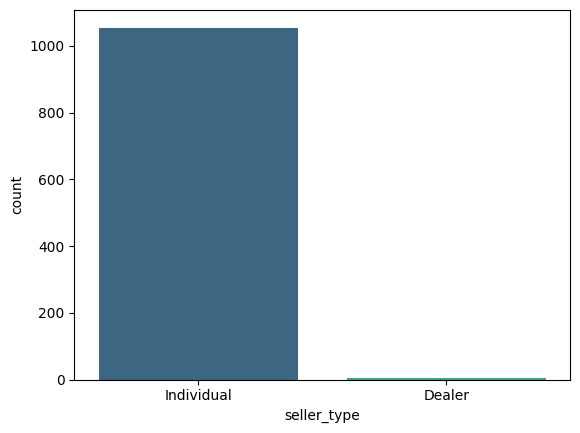

In [77]:
sns.countplot(x = df['seller_type'], palette = 'viridis')

In [78]:
#it is clear from the above countplot that the common seller type is an individual

#4. How many bikes have driven more than 50,000 kilometersD

In [79]:
km_50k = [km for km in df['km_driven'] if km> 50000]
print('Total no. of bikes that have driven more than 50000 kms is:' ,len(km_50k))

Total no. of bikes that have driven more than 50000 kms is: 170


#5. What is the average km_driven value for each ownership type?



In [80]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


#6. What proportion of bikes are from the year 2015 or older?



In [81]:
df.year.unique()

array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995])

In [82]:
df.year.sort_values(ascending = False)

,year
101,2020
136,2020
14,2020
0,2019
671,2019
...,...
363,1997
868,1995
861,1993
567,1991


In [83]:
df1 = pd.DataFrame(df.year.value_counts()).T
df1

year,2017,2018,2016,2015,2014,2019,2013,2012,2011,2010,...,2002,1998,1997,2001,1988,1999,1991,2003,1993,1995
count,133,131,107,100,91,86,73,70,61,60,...,3,3,2,2,1,1,1,1,1,1


In [84]:
df1.columns

Index([2017, 2018, 2016, 2015, 2014, 2019, 2013, 2012, 2011, 2010, 2007, 2008,
       2009, 2006, 2005, 2000, 2004, 2020, 2002, 1998, 1997, 2001, 1988, 1999,
       1991, 2003, 1993, 1995],
      dtype='int64', name='year')

In [85]:
sum_of_bikes = 0
for i in df1.columns:
  if i <= 2015:
    sum_of_bikes  = sum_of_bikes + df1[i].iloc[0]
  else:
    None



proportion =  sum_of_bikes/ len(df) *100
print("the proportion of bikes from 2015 or older is ",proportion)



the proportion of bikes from 2015 or older is  56.64467483506126


In [86]:
sum_of_bikes

np.int64(601)

#7. What is the trend of missing values across the dataset?


In [87]:
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


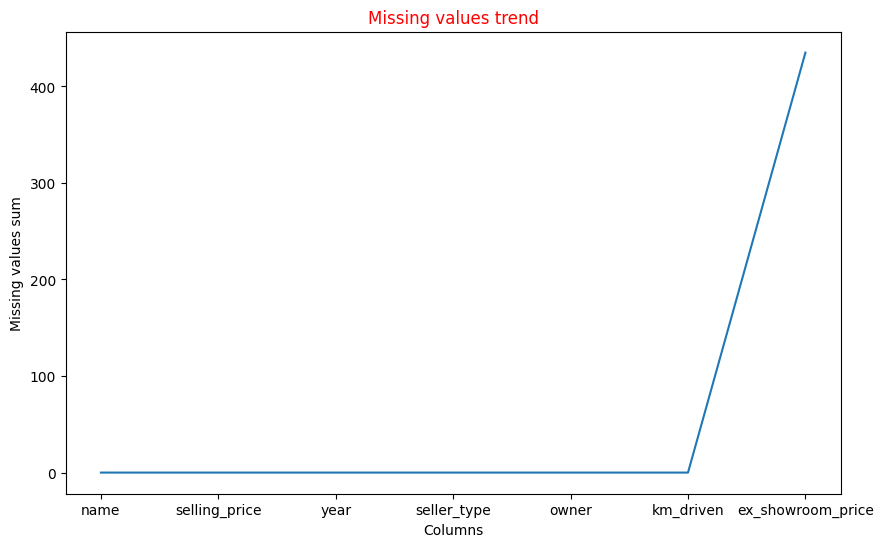

In [88]:
#TREND IN DATASET
plt.figure(figsize = (10,6))
sns.lineplot(x = df.columns, y = df.isnull().sum())
plt.title("Missing values trend", color = 'red')
plt.xlabel("Columns")
plt.ylabel("Missing values sum")
plt.show()

In [89]:
#Insights > there are no null in any column except ex_showroom_price which has 435 null values

#8. What is the highest ex_showroom_price recorded, and for which bike

In [90]:
max = df.ex_showroom_price.max()
max

1278000.0

In [91]:
df['ex_showroom_price'].idxmax()

134

In [92]:
name_bike = df["name"].iloc[134]
name_bike

'Harley-Davidson Street Bob'

In [93]:
print("The highest ex showroom price is",max,"for the bike ",name_bike)

The highest ex showroom price is 1278000.0 for the bike  Harley-Davidson Street Bob


#9. What is the total number of bikes listed by each seller type

In [94]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


From the above result it is clear that the total no. of bikes listed by INDIVIDUAL SELLER is 1055 , while for DEALER  is 6 bikes.

#10. What is the relationship between selling_price and km_driven for first-owner bikes

In [95]:
first_owner_bikes = df[df['owner'] == '1st owner']
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


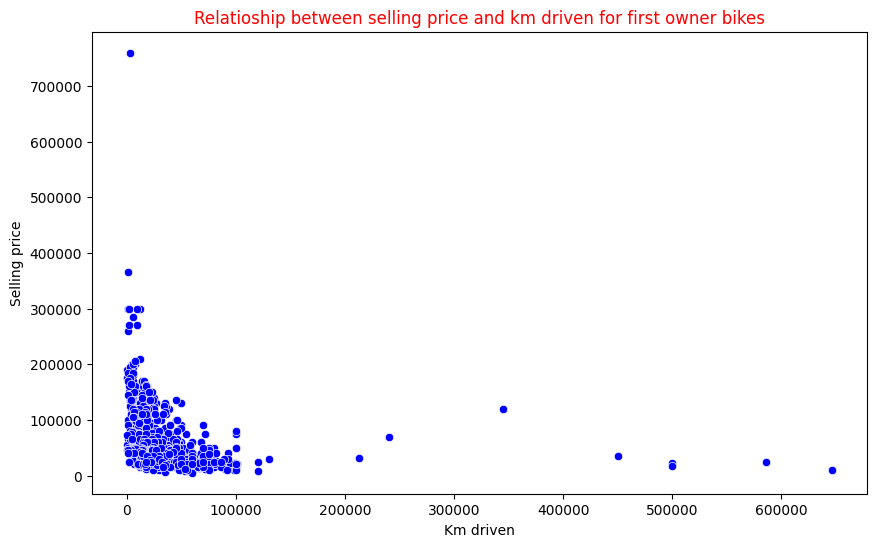

In [96]:
plt.figure(figsize = (10,6))
sns.scatterplot(y = first_owner_bikes['selling_price'], x = first_owner_bikes['km_driven'],color = 'blue')
plt.title('Relatioship between selling price and km driven for first owner bikes', color = 'red')
plt.ylabel('Selling price')
plt.xlabel('Km driven')
plt.show()

In [97]:
#insights >> bikes which are driven less kilometers have a higher selling price while those bikes which have driven more than 100000 km have a low selling price.

#11. Identify and remove outliers in the km_driven column using the IQR method

<Axes: xlabel='km_driven'>

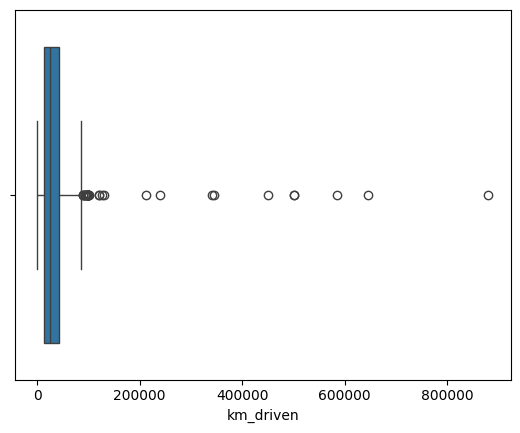

In [98]:
sns.boxplot(x = df['km_driven'])

In [99]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3-Q1

In [100]:
lower_fence  = Q1 - 1.5*IQR
upper_fence  = Q3 + 1.5*IQR

In [101]:
df = df[(df['km_driven'] >= lower_fence) & (df['km_driven'] <= upper_fence)]

In [102]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


<Axes: xlabel='km_driven'>

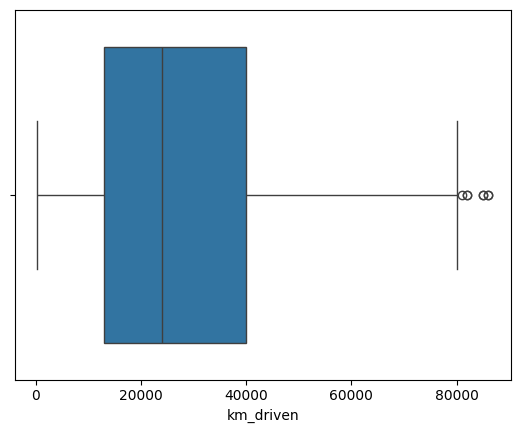

In [103]:
sns.boxplot(x = df['km_driven'])

#12. Perform a bivariate analysis to visualize the relationship between year and selling_price

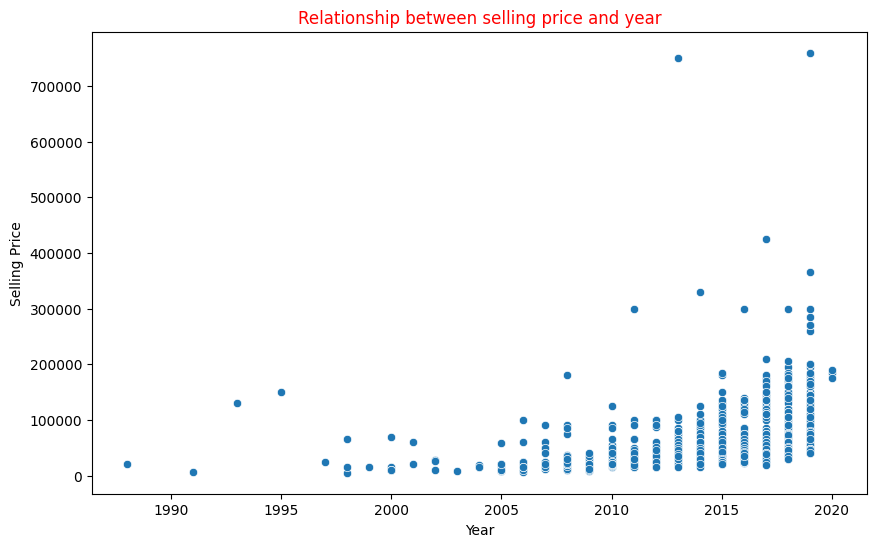

In [104]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df['year'], y = df['selling_price'], palette = 'Set1',marker = 'o')
plt.title("Relationship between selling price and year", color = 'red')
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

In [105]:
#INSIGHTS > bikes that has been manufactured after 2010 have a higher selling price than th bikes manufactured before 2010
#time perioo between 2015 -2020 has seen a rapid increase in the selling price of the  bikes which could be because of many factors such as advancement in technology, skilled workforce,etc.

#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

In [106]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['year']
# Calculate average depreciation for each age group
average_depreciation = df.groupby('age')['selling_price'].mean()


print(average_depreciation)

age
5     183333.333333
6     119689.511628
7      87660.374046
8      78962.121212
9      57924.126214
10     56313.131313
11     49121.348315
12     51802.816901
13     36157.560606
14     35931.017241
15     32350.877193
16     22934.782609
17     36404.000000
18     27768.181818
19     23821.052632
20     16978.571429
21     16000.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     25000.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


#14. Which bike names are priced significantly above the average price for their manufacturing year

In [107]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'age'],
      dtype='object')

In [108]:
avg_price_year = pd.DataFrame(df.groupby('year')['selling_price'].mean())
avg_price_year

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,25000.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


In [109]:
filtered_df = df[df['year'].isin(avg_price_year.index)]

In [110]:
filtered_df['price_difference'] = filtered_df['selling_price'] - filtered_df['year'].map(avg_price_year['selling_price'])

In [111]:
filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,price_difference
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,55310.488372
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,-33962.121212
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,62339.625954
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,8686.868687
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,-15931.017241
...,...,...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0,15,-12350.877193
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,8,-60962.121212
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13,-20157.560606
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12,-36802.816901


In [112]:
for bike in filtered_df.iterrows():
  if bike[1]['price_difference'] > 0:
     print(bike[1]['name'])


Royal Enfield Classic 350
Royal Enfield Classic Gunmetal Grey
Yamaha Fazer FI V 2.0 [2016-2018]
Royal Enfield Bullet 350 [2007-2011]
Yamaha YZF R3
Jawa 42
Hero Honda Glamour
Yamaha YZF R15 S
Royal Enfield Classic Gunmetal Grey
Yamaha FZ25
Jawa Standard
Royal Enfield Thunderbird 350
Honda CBR-250R
Royal Enfield Thunderbird 350
Bajaj Dominar 400
KTM 390 Duke
Yamaha FZ16
Royal Enfield Electra 5 S
Hero Honda Passion Plus
Royal Enfield Bullet 350
Bajaj Pulsar 150 [2001-2011]
Hero Xtreme Sports
Honda CB Hornet 160R
Royal Enfield Thunderbird 350
Royal Enfield Electra 4 S
Mahindra Mojo XT300
Bajaj Pulsar AS200
Royal Enfield Thunderbird 350X
Suzuki Intruder 150
Hero Honda Karizma ZMR [2010]
Royal Enfield Thunderbird 350X
Honda CB Unicorn 150
Hero Honda CD Deluxe
Royal Enfield Classic Gunmetal Grey
Yamaha FZ25
Royal Enfield Thunderbird 350X
Royal Enfield Classic Desert Storm
TVS Apache RTR 200 4V
Yamaha FZ25
Royal Enfield Thunderbird 350
UM Renegade Commando
Royal Enfield Classic Gunmetal Grey
R

In [113]:
filtered_df.reset_index(drop = True, inplace = True)

In [114]:
filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,price_difference
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6,55310.488372
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,-33962.121212
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7,62339.625954
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,8686.868687
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,-15931.017241
...,...,...,...,...,...,...,...,...,...
1017,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0,15,-12350.877193
1018,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,8,-60962.121212
1019,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13,-20157.560606
1020,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12,-36802.816901


#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [115]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64
age,int64


In [116]:
num_col = [col for col in df.columns if df[col].dtype != 'O']

In [117]:
num_col

['selling_price', 'year', 'km_driven', 'ex_showroom_price', 'age']

In [118]:
df1 = df[num_col]
df1

,selling_price,year,km_driven,ex_showroom_price,age
0,175000,2019,350,NaN,6
1,45000,2017,5650,NaN,8
2,150000,2018,12000,148114.0,7
3,65000,2015,23000,89643.0,10
4,20000,2011,21000,NaN,14
...,...,...,...,...,...
1054,20000,2010,50000,78700.0,15
1055,18000,2017,35000,32000.0,8
1057,16000,2012,33000,51000.0,13
1058,15000,2013,35000,57000.0,12


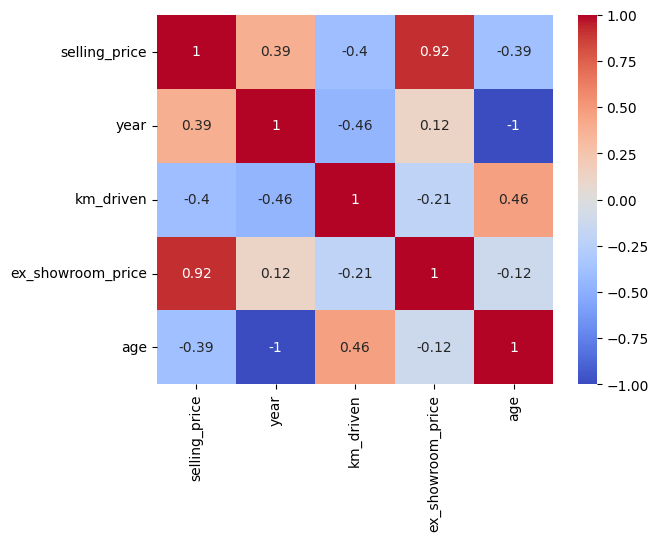

In [119]:
# Creating the heatmap using the correlation matrix
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()